In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import glob

Exploring our Data

In [2]:
crunchbase = os.path.join(os.getcwd(), "crunchbase-investments.csv")
df = pd.read_csv(crunchbase, encoding='latin1')
df.head()

<ipython-input-2-b0d31e4a195f>:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(crunchbase, encoding='latin1')


company_permalink company_name company_category_code  \
0    /company/advercar     AdverCar           advertising   
1  /company/launchgram   LaunchGram                  news   
2        /company/utap         uTaP             messaging   
3    /company/zoopshop     ZoopShop              software   
4    /company/efuneral     eFuneral                   web   

  company_country_code company_state_code         company_region  \
0                  USA                 CA                 SF Bay   
1                  USA                 CA                 SF Bay   
2                  USA                NaN  United States - Other   
3                  USA                 OH               Columbus   
4                  USA                 OH              Cleveland   

    company_city          investor_permalink      investor_name  \
0  San Francisco  /company/1-800-flowers-com  1-800-FLOWERS.COM   
1  Mountain View        /company/10xelerator        10Xelerator   
2            NaN        /company/10xelerator        10Xelerator   
3       columbus        /company/10xelerator        10Xelerator   
4      Cleveland        /company/10xelerator        10Xelerator   

  investor_category_code investor_country_code investor_state_code  \
0                    NaN                   USA                  NY   
1                finance                   USA                  OH   
2                finance                   USA                  OH   
3                finance                   USA                  OH   
4                finance                   USA                  OH   

  investor_region investor_city funding_round_type   funded_at funded_month  \
0        New York      New York           series-a  2012-10-30      2012-10   
1        Columbus      Columbus              other  2012-01-23      2012-01   
2        Columbus      Columbus              other  2012-01-01      2012-01   
3        Columbus      Columbus              angel  2012-02-15      2012-02   
4        Columbus      Columbus              other  2011-09-08      2011-09   

  funded_quarter  funded_year  raised_amount_usd  
0        2012-Q4       2012.0          2000000.0  
1        2012-Q1       2012.0            20000.0  
2        2012-Q1       2012.0            20000.0  
3        2012-Q1       2012.0            20000.0  
4        2011-Q3       2011.0            20000.0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52870 entries, 0 to 52869
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   company_permalink       52869 non-null  object 
 1   company_name            52869 non-null  object 
 2   company_category_code   52227 non-null  object 
 3   company_country_code    52869 non-null  object 
 4   company_state_code      52378 non-null  object 
 5   company_region          52869 non-null  object 
 6   company_city            52337 non-null  object 
 7   investor_permalink      52868 non-null  object 
 8   investor_name           52868 non-null  object 
 9   investor_category_code  2443 non-null   object 
 10  investor_country_code   40869 non-null  object 
 11  investor_state_code     36061 non-null  object 
 12  investor_region         52868 non-null  object 
 13  investor_city           40390 non-null  object 
 14  funding_round_type      52867 non-null

In [4]:
df["company_name"].value_counts()

company_name
ecomom                    58
Fab.com                   57
Aperto Networks           49
Practice Fusion           47
Klout                     46
                          ..
ServiceMesh                1
University of Arkansas     1
SAIC                       1
TranSwitch                 1
Estimote                   1
Name: count, Length: 11573, dtype: int64

In [5]:
company_investments = df.groupby('company_name').size()
median_investments = company_investments.median()
mean_investments = company_investments.mean()
print(median_investments)
print(mean_investments)

3.0
4.568305538753997


<Axes: xlabel='investor_name'>

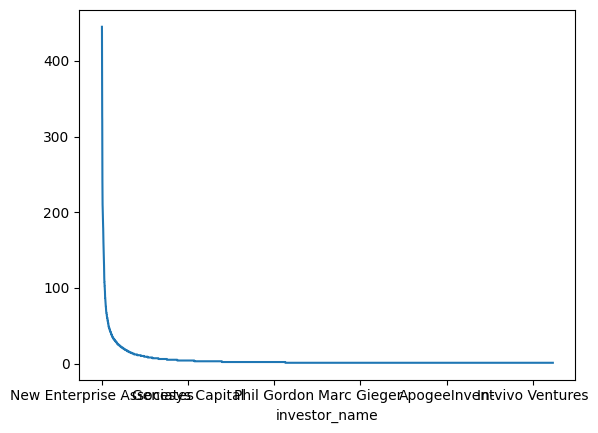

In [6]:
df["investor_name"].value_counts().plot()

In [7]:
df.describe()

df.describe(include='object')


company_permalink company_name company_category_code  \
count              52869        52869                 52227   
unique             11573        11573                    43   
top      /company/ecomom       ecomom              software   
freq                  58           58                  7243   

       company_country_code company_state_code company_region   company_city  \
count                 52869              52378          52869          52337   
unique                    2                 50            546           1229   
top                     USA                 CA         SF Bay  San Francisco   
freq                  52868              27054          22167           8650   

                                       investor_permalink  \
count                                               52868   
unique                                              10552   
top     /financial-organization/new-enterprise-associates   
freq                                                  445   

                    investor_name investor_category_code  \
count                       52868                   2443   
unique                      10465                     33   
top     New Enterprise Associates                finance   
freq                          445                    586   

       investor_country_code investor_state_code investor_region  \
count                  40869               36061           52868   
unique                    72                  50             585   
top                      USA                  CA          SF Bay   
freq                   36574               18405           16974   

       investor_city funding_round_type   funded_at funded_month  \
count          40390              52867       52867        52867   
unique           990                  9        2808          192   
top       Menlo Park           series-a  2008-01-01      2012-01   
freq            7086              13938         390         1005   

       funded_quarter  
count           52867  
unique             72  
top           2013-Q3  
freq             2514

In [8]:
# Remove any investors with fewer than 4 investments
investor_counts = df.groupby('investor_name').size().reset_index(name='investment_count')

filtered_investors = investor_counts[investor_counts['investment_count'] > 4]

df = df[df['investor_name'].isin(filtered_investors['investor_name'])]

df.shape

(40208, 20)

In [9]:
df['investor_name'].nunique()

1747

In [10]:
# Check for missing values
print(df.isnull().sum())

company_permalink             0
company_name                  0
company_category_code       472
company_country_code          0
company_state_code          327
company_region                0
company_city                356
investor_permalink            0
investor_name                 0
investor_category_code    38627
investor_country_code      4591
investor_state_code        7782
investor_region               0
investor_city              4862
funding_round_type            0
funded_at                     0
funded_month                  0
funded_quarter                0
funded_year                   0
raised_amount_usd          2493
dtype: int64


In [11]:
# Check how many values for each categorical column
for col in df.columns:
    print(col, ": ", len(df[col].unique()), "unique values")
    print(df[col].unique())
    print("\n")

company_permalink :  9520 unique values
['/company/launchgram' '/company/utap' '/company/zoopshop' ...
 '/company/musestorm' '/company/seetoo' '/company/estimote']


company_name :  9520 unique values
['LaunchGram' 'uTaP' 'ZoopShop' ... 'MuseStorm' 'SeeToo' 'Estimote']


company_category_code :  43 unique values
['news' 'messaging' 'software' 'web' 'analytics' 'games_video' 'mobile'
 'advertising' 'enterprise' 'ecommerce' 'search' 'hospitality' 'music'
 'finance' 'biotech' 'sports' 'nonprofit' 'other' 'social'
 'transportation' 'real_estate' 'hardware' 'consulting' 'pets' 'education'
 'travel' 'automotive' 'health' nan 'legal' 'public_relations' 'design'
 'fashion' 'photo_video' 'local' 'cleantech' 'medical' 'network_hosting'
 'semiconductor' 'security' 'nanotech' 'manufacturing' 'government']


company_country_code :  1 unique values
['USA']


company_state_code :  49 unique values
['CA' nan 'OH' 'MA' 'NY' 'WA' 'MD' 'DC' 'NJ' 'AZ' 'CO' 'NC' 'PA' 'TX' 'UT'
 'CT' 'MO' 'NV' 'KY' 'RI' 'MI

Feature Engineering

In [12]:
df.columns

Index(['company_permalink', 'company_name', 'company_category_code',
       'company_country_code', 'company_state_code', 'company_region',
       'company_city', 'investor_permalink', 'investor_name',
       'investor_category_code', 'investor_country_code',
       'investor_state_code', 'investor_region', 'investor_city',
       'funding_round_type', 'funded_at', 'funded_month', 'funded_quarter',
       'funded_year', 'raised_amount_usd'],
      dtype='object')

In [13]:
# Drop irrelevant columns
drop_cols = ['company_state_code', 'company_city', 'investor_category_code', 'investor_state_code', 'investor_country_code', 'investor_city', 'raised_amount_usd', 'company_permalink', 'investor_permalink', 'funded_month', 'funded_quarter', 'funded_at']
df = df.drop(drop_cols, axis=1)
print(df.columns)

Index(['company_name', 'company_category_code', 'company_country_code',
       'company_region', 'investor_name', 'investor_region',
       'funding_round_type', 'funded_year'],
      dtype='object')


In [14]:
# Fill missing "company category codes" will the most common value
most_common_category = df['company_category_code'].mode()[0]
df['company_category_code'].fillna(most_common_category, inplace=True)
missing_category_after_backfill = df['company_category_code'].isnull().sum()

missing_category_after_backfill

<ipython-input-14-4f0c76a04521>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['company_category_code'].fillna(most_common_category, inplace=True)


0

In [15]:
df.head()

company_name company_category_code company_country_code  \
1   LaunchGram                  news                  USA   
2         uTaP             messaging                  USA   
3     ZoopShop              software                  USA   
4     eFuneral                   web                  USA   
5        Tackk                   web                  USA   

          company_region investor_name investor_region funding_round_type  \
1                 SF Bay   10Xelerator        Columbus              other   
2  United States - Other   10Xelerator        Columbus              other   
3               Columbus   10Xelerator        Columbus              angel   
4              Cleveland   10Xelerator        Columbus              other   
5              Cleveland   10Xelerator        Columbus              other   

   funded_year  
1       2012.0  
2       2012.0  
3       2012.0  
4       2011.0  
5       2012.0

Now, the dataset has an entry for each investment made by an investor. It is grouped by investor.

In [16]:
df.isnull().sum()

company_name             0
company_category_code    0
company_country_code     0
company_region           0
investor_name            0
investor_region          0
funding_round_type       0
funded_year              0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40208 entries, 1 to 52851
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   company_name           40208 non-null  object 
 1   company_category_code  40208 non-null  object 
 2   company_country_code   40208 non-null  object 
 3   company_region         40208 non-null  object 
 4   investor_name          40208 non-null  object 
 5   investor_region        40208 non-null  object 
 6   funding_round_type     40208 non-null  object 
 7   funded_year            40208 non-null  float64
dtypes: float64(1), object(7)
memory usage: 2.8+ MB


In [18]:
!pip install scikit-surprise


In [19]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise import accuracy

# Create utility matrix with investors as columns, companies as rows

df['company_id'] = df['company_name'].astype('category').cat.codes
df['investor_id'] = df['investor_name'].astype('category').cat.codes

utility_matrix = df.pivot_table(index='company_name',
                                columns='investor_name',
                                aggfunc='size',
                                fill_value=0)

# Convert utility matrix to long format (surprise format)

# .melt() sort of unpivots
utility_matrix_long = utility_matrix.reset_index().melt(id_vars='company_name', var_name='investor_name', value_name='invested')
utility_matrix_long = utility_matrix_long[utility_matrix_long['invested'] > 0]  # Only keep rows where there is an investment

# Map company_name and investor_name to numeric IDs if needed
company_id_mapping = {name: i for i, name in enumerate(utility_matrix_long['company_name'].unique())}
investor_id_mapping = {name: i for i, name in enumerate(utility_matrix_long['investor_name'].unique())}

utility_matrix_long['company_id'] = utility_matrix_long['company_name'].map(company_id_mapping)
utility_matrix_long['investor_id'] = utility_matrix_long['investor_name'].map(investor_id_mapping)


print(utility_matrix_long.head(200))

                   company_name  investor_name  invested  company_id  \
123                      AbilTo  .406 Ventures         1           0   
453            American Biomass  .406 Ventures         1           1   
728                  Attendware  .406 Ventures         1           2   
1032                       Bit9  .406 Ventures         2           3   
1751   CloudHealth Technologies  .406 Ventures         1           4   
...                         ...            ...       ...         ...   
71719             MyHealthTeams   500 Startups         1         191   
71731                    MyTime   500 Startups         1         192   
71850                NetPlenish   500 Startups         1         193   
71870                    Nettle   500 Startups         1         194   
71963                     Ninua   500 Startups         1         195   

       investor_id  
123              0  
453              0  
728              0  
1032             0  
1751             0  
...      

<ipython-input-19-81440aadb45f>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  utility_matrix_long['company_id'] = utility_matrix_long['company_name'].map(company_id_mapping)
<ipython-input-19-81440aadb45f>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  utility_matrix_long['investor_id'] = utility_matrix_long['investor_name'].map(investor_id_mapping)


In [28]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise import accuracy


# Train test split leaves one company out of training data
def train_test_split_custom(df):
    test_data = []
    train_data = []

    for investor in df['investor_id'].unique():
        investor_data = df[df['investor_id'] == investor]
        if len(investor_data) > 1:
            test_sample = investor_data.sample(n=1)
            train_sample = investor_data.drop(test_sample.index)  # Rest goes to training

            test_data.append(test_sample)
            train_data.append(train_sample)

            # Print the company left out for this investor
            print(f"Investor ID: {investor}, Test (Left-Out) Company: {test_sample['company_id'].values[0]}")
        else:
            train_data.append(investor_data)

    test_data = pd.concat(test_data)
    train_data = pd.concat(train_data)

    return train_data, test_data


train_data, test_data = train_test_split_custom(utility_matrix_long)

reader = Reader(rating_scale=(0, 1))
trainset = Dataset.load_from_df(train_data[['investor_id', 'company_id', 'invested']], reader).build_full_trainset()

model = SVD()
model.fit(trainset)


def recommend_for_investor(investor_id, n_recommendations=10):
    all_company_ids = utility_matrix_long['company_id'].unique()
    already_invested = utility_matrix_long[utility_matrix_long['investor_id'] == investor_id]['company_id'].unique()

    recommendations = [
        (company_id, model.predict(investor_id, company_id).est)  # Pass raw IDs here
        for company_id in all_company_ids if company_id not in already_invested
    ]

    recommendations.sort(key=lambda x: x[1], reverse=True)
    return recommendations[:n_recommendations]


# Test with the first investor in train set
investor_id = utility_matrix_long['investor_id'].unique()[0]  # Use the first investor from the original DataFrame
recommendations = recommend_for_investor(investor_id, n_recommendations=10)
print(f"Recommendations for Investor ID {investor_id}: {recommendations}")


# Step 5: Evaluate Model Performance
def precision_at_k(test_data, k=5):
    hits = 0
    total = 0

    for investor_id in test_data['investor_id'].unique():
        actual_company = test_data[test_data['investor_id'] == investor_id]['company_id'].values[0]
        recommendations = recommend_for_investor(investor_id, n_recommendations=k)
        recommended_companies = [rec[0] for rec in recommendations]

        # Debug output to see actual and recommended companies
        print(f"Investor ID: {investor_id}, Actual Company: {actual_company}, Recommended: {recommended_companies}")

        # Check if the actual company is in the top K recommendations
        if actual_company in recommended_companies:
            hits += 1
        total += 1
        print("hits/total:", hits, "/", total)

    return hits / total if total > 0 else 0


# Evaluate the precision of the model
precision = precision_at_k(test_data, k=10)
print(f"Precision@10: {precision * 100:.2f}%")


Investor ID: 0, Test (Left-Out) Company: 145
Investor ID: 1, Test (Left-Out) Company: 295
Investor ID: 2, Test (Left-Out) Company: 448
Investor ID: 3, Test (Left-Out) Company: 586
Investor ID: 4, Test (Left-Out) Company: 672
Investor ID: 5, Test (Left-Out) Company: 765
Investor ID: 6, Test (Left-Out) Company: 798
Investor ID: 7, Test (Left-Out) Company: 855
Investor ID: 8, Test (Left-Out) Company: 1039
Investor ID: 9, Test (Left-Out) Company: 1176
Investor ID: 10, Test (Left-Out) Company: 514
Investor ID: 11, Test (Left-Out) Company: 1358
Investor ID: 12, Test (Left-Out) Company: 1372
Investor ID: 13, Test (Left-Out) Company: 1467
Investor ID: 14, Test (Left-Out) Company: 434
Investor ID: 15, Test (Left-Out) Company: 1663
Investor ID: 16, Test (Left-Out) Company: 501
Investor ID: 17, Test (Left-Out) Company: 1770
Investor ID: 18, Test (Left-Out) Company: 1936
Investor ID: 19, Test (Left-Out) Company: 1027
Investor ID: 20, Test (Left-Out) Company: 2015
Investor ID: 21, Test (Left-Out) C

In [ ]:
import pandas as pd
from surprise import Dataset, Reader, KNNBasic
from surprise import accuracy
import numpy as np


# Matrix
df['company_id'] = df['company_name'].astype('category').cat.codes
df['investor_id'] = df['investor_name'].astype('category').cat.codes

df['invested'] = 1

# Need a matrix with a bunch of 1s and a bunch of question marks

# add negative examples - every company/investor interaction that DIDN'T happen

def train_test_split_custom(df):
    test_data = []
    train_data = []

    for investor in df['investor_id'].unique():
        investor_data = df[df['investor_id'] == investor]
        if len(investor_data) > 1:
            test_sample = investor_data.sample(n=1)  # Pick one company to move to the test set
            train_sample = investor_data.drop(test_sample.index)

            test_data.append(test_sample)
            train_data.append(train_sample)
        else:
            train_data.append(investor_data)

    test_data = pd.concat(test_data)
    train_data = pd.concat(train_data)

    return train_data, test_data

train_data, test_data = train_test_split_custom(df)

reader = Reader(rating_scale=(0, 1))
trainset = Dataset.load_from_df(train_data[['investor_id', 'company_id', 'invested']], reader)
trainset = trainset.build_full_trainset()

model = KNNBasic(sim_options={'name': 'cosine', 'user_based': True})
model.fit(trainset)

def recommend_for_investor(investor_id, n_recommendations=5):
    all_company_ids = df['company_id'].unique()
    already_invested = df[df['investor_id'] == investor_id]['company_id'].unique()

    recommendations = [
        (company_id, model.predict(investor_id, company_id).est)
        for company_id in all_company_ids if company_id not in already_invested
    ]

    recommendations.sort(key=lambda x: x[1], reverse=True)
    return recommendations[:n_recommendations]

investor_id = train_data['investor_id'].unique()[0]  # Use the first investor in the train set
recommendations = recommend_for_investor(investor_id, n_recommendations=5)
print(f"Recommendations for Investor ID {investor_id}: {recommendations}")

def precision_at_k(test_data, k=5):
    hits = 0
    total = 0

    for investor_id in test_data['investor_id'].unique():
        actual_company = test_data[test_data['investor_id'] == investor_id]['company_id'].values[0]
        recommendations = recommend_for_investor(investor_id, n_recommendations=k)
        recommended_companies = [rec[0] for rec in recommendations]

        print(f"Investor ID: {investor_id}, Actual Company: {actual_company}, Recommended: {recommended_companies}")

        if actual_company in recommended_companies:
            hits += 1
        total += 1
        print("hits/total:", hits, "/", total)

    return hits / total if total > 0 else 0

precision = precision_at_k(test_data, k=5)
print(f"Precision@5: {precision * 100:.2f}%")


Computing the cosine similarity matrix...
Done computing similarity matrix.
Recommendations for Investor ID 58: [(3266, 1), (3079, 1), (607, 1), (3801, 1), (230, 1)]
Investor ID: 58, Actual Company: 1496, Recommended: [3266, 3079, 607, 3801, 230]
hits/total: 0 1
Investor ID: 64, Actual Company: 1004, Recommended: [4513, 1801, 577, 1885, 1327]
hits/total: 0 2
Investor ID: 0, Actual Company: 3030, Recommended: [4513, 1801, 577, 1885, 1327]
hits/total: 0 3
Investor ID: 1, Actual Company: 3039, Recommended: [4513, 1801, 577, 1885, 1327]
hits/total: 0 4
Investor ID: 2, Actual Company: 3455, Recommended: [4513, 1801, 577, 1885, 1327]
hits/total: 0 5
Investor ID: 3, Actual Company: 115, Recommended: [4513, 1801, 577, 1885, 1327]
hits/total: 0 6
Investor ID: 4, Actual Company: 3409, Recommended: [4513, 1801, 577, 1885, 1327]
hits/total: 0 7
Investor ID: 5, Actual Company: 3034, Recommended: [4513, 1801, 577, 1885, 1327]
hits/total: 0 8
Investor ID: 6, Actual Company: 4140, Recommended: [4513, 

In [ ]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate

# Load the movielens-100k dataset (download it if needed).
data = Dataset.load_builtin('ml-100k')

for i in range(10):
    print(data.construct_trainset())

print(dir(data))

# Understand what input surprise is expecting
# If we made our datset to match ml-100k to match it exactly
# then consider output

TypeError: Dataset.construct_trainset() missing 1 required positional argument: 'raw_trainset'

In [ ]:
def recall_at_k(model, interactions, k=10):
    """Calculate Recall@k for each investor"""

    recalls = []
    num_items = interactions.shape[1]  # Get the number of columns (items) in the interaction matrix
    for investor_id in range(interactions.shape[0]):
        # Extract the specific row for this investor and convert to CSR format
        user_interaction = interactions.getrow(investor_id).tocsr()

        if user_interaction.nnz == 0:  # Skip users with no interactions
            recalls.append(0)
            continue

        # Ensure that recommended items are within valid bounds
        recommendations = model.recommend(investor_id, user_interaction, N=k, filter_already_liked_items=True)
        recommended_items = set([i for i in recommendations[0] if i < num_items])  # Filter out of bounds items

        # Get actual investments (items interacted with by this investor)
        actual_items = set(interactions.getrow(investor_id).indices)

        # Calculate recall: relevant items recommended / all relevant items
        if len(actual_items) > 0:
            recalls.append(len(recommended_items & actual_items) / len(actual_items))
        else:
            recalls.append(0)

    return np.mean(recalls)


In [ ]:
def mean_average_precision(model, interactions, k=10):
    """Calculate Mean Average Precision (MAP) for each investor"""
    average_precisions = []
    num_items = interactions.shape[1]  # Ensure consistency with item count
    for investor_id in range(interactions.shape[0]):
        recommendations = model.recommend(investor_id, interactions, N=k, filter_already_liked_items=True)
        recommended_items = [i for i, _ in recommendations if i < num_items]  # Filter out of bounds items

        actual_items = set(interactions.getrow(investor_id).indices)

        num_hits = 0
        precision_sum = 0
        for i, recommended_item in enumerate(recommended_items):
            if recommended_item in actual_items:
                num_hits += 1
                precision_sum += num_hits / (i + 1)

        if len(actual_items) > 0:
            average_precisions.append(precision_sum / min(len(actual_items), k))
        else:
            average_precisions.append(0)

    return np.mean(average_precisions)


In [ ]:
# Step 1: Create the test interaction matrix
test_df = pd.read_csv('test_data.csv')
test_df['investor_idx'] = test_df['investor_name'].map(investor_mapping)
test_df['company_idx'] = test_df['company_name'].map(company_mapping)

test_interaction_matrix = coo_matrix((
    [1] * len(test_df),
    (test_df['investor_idx'], test_df['company_idx'])
))

print("Original test interaction matrix shape:", test_interaction_matrix.shape)


NameError: name 'test_df' is not defined

In [ ]:
# Get valid user indices (those that exist in the original interaction matrix)
valid_user_indices = test_df['investor_idx'].unique()  # Unique investor indices

# Map the valid user indices to their corresponding positions in the filtered interaction matrix
valid_user_indices_in_matrix = np.array([np.where(valid_user_indices == i)[0][0] for i in range(len(valid_user_indices)) if i in valid_user_indices])

# Filter the interaction matrix to keep only valid users and valid companies
filtered_interaction_matrix = test_interaction_matrix_csr[valid_user_indices, :][:, valid_company_indices]

# Now we should create a mapping from original investor indices to their positions in filtered_interaction_matrix
# Mapping for the remaining users
user_mapping = {original_idx: new_idx for new_idx, original_idx in enumerate(valid_user_indices)}

print("Filtered interaction matrix shape:", filtered_interaction_matrix.shape)  # Should be (1464, 1747)
print("Valid user indices for evaluation:", valid_user_indices_for_eval)
print("Count of valid user indices:", len(valid_user_indices_for_eval))

print("Filtered interaction matrix (sample):", filtered_interaction_matrix[:5, :5].toarray())  # Preview the first few interactions




NameError: name 'test_interaction_matrix_csr' is not defined

In [ ]:
# Step 3: Evaluate the model on precision@k, recall@k, and MAP@k

# Create a mapping from original investor indices to their new indices in the filtered interaction matrix
user_mapping = {original_idx: new_idx for new_idx, original_idx in enumerate(valid_user_indices)}

# Get the valid indices for evaluation from the filtered interaction matrix
valid_user_indices_for_eval = np.array(list(user_mapping.values()))

# Evaluate using the correct indices
precision = precision_at_k(als_model, filtered_interaction_matrix[valid_user_indices_for_eval, :], k=10)
recall = recall_at_k(als_model, filtered_interaction_matrix[valid_user_indices_for_eval, :], k=10)
map_at_k = mean_average_precision(als_model, filtered_interaction_matrix[valid_user_indices_for_eval, :], k=10)

print(f"Precision@10: {precision}")
print(f"Recall@10: {recall}")
print(f"MAP@10: {map_at_k}")



NameError: name 'filtered_interaction_matrix' is not defined

In [ ]:
# before, num of items in matrix was 9520 while in the model was 1747, causing index error (1747 investors to 9520 companies)
# to fix, will filter the interaction matrix to include only items present in the ALS model
print("Number of items in interaction matrix:", test_interaction_matrix.shape[1])
print("Number of items in the ALS model:", als_model.item_factors.shape[0])

# Inside precision_at_k or recall_at_k, add this check
print(f"Evaluating investor {investor_id}...")
print(f"Recommendations: {recommendations}")


Number of items in interaction matrix: 9520
Number of items in the ALS model: 1747
Evaluating investor 0...
Recommendations: (array([13, 12, 11, 10,  9,  8,  7,  6,  3,  0], dtype=int32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32))


In [ ]:

from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate

# Load the movielens-100k dataset (download it if needed).
data = Dataset.load_builtin('ml-100k')

# Use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results.
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

ModuleNotFoundError: No module named 'surprise'

In [ ]:
from lightfm import LightFM
from lightfm.datasets import fetch_movielens
from lightfm.evaluation import precision_at_k

# Load the MovieLens 100k dataset. Only five
# star ratings are treated as positive.
data = fetch_movielens(min_rating=1.0)

data['train']

# expects an input that is a sparse matrix of investors by companies - have to work with the dataset to match it to what this is expecting
# turn into deicsion matrix into sparse matrix

<943x1682 sparse matrix of type '<class 'numpy.int32'>'
	with 90570 stored elements in COOrdinate format>

In [ ]:
# once we reach MPV, work on visualizing metrics
# gainchart: A gain chart is a visual tool that assesses the effectiveness of a model for binary classification tasks. It compares the results of a model to a random selection method.

# few different metrics:
# lip chart? what you do with real world data, shows how your model's predictions compare to random guesses
# what percentage of the time is the right company int he top 10 suggested? vs. picking 10 companies randomly for an investor

# try to show metrics

# incorporate LLMS - query and get text responses

In [21]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score
import numpy as np


# THIS IS THE WORKING ONE !

investor_company_matrix = df.pivot_table(index='investor_name', columns='company_name', aggfunc='size', fill_value=0)

# Calculate cosine similarity between investors
similarity_matrix = cosine_similarity(investor_company_matrix)

# Create a function to split the dataset ensuring each test set holds one unseen company per investor
def split_data(df):
    train = []
    test = []

    for investor in df['investor_name'].unique():
        investor_data = df[df['investor_name'] == investor]
        # Randomly select one company for testing
        test_company = investor_data.sample(1)
        test.append(test_company)
        # Remove the test company from training data
        train_data = investor_data.drop(test_company.index)
        train.append(train_data)

    # Concatenate training and test data
    train_set = pd.concat(train)
    test_set = pd.concat(test)

    return train_set, test_set

# Split the dataset
train_set, test_set = split_data(df)

# Create a new user-item matrix for the training set
investor_company_matrix_train = train_set.pivot_table(index='investor_name', columns='company_name', aggfunc='size', fill_value=0)

# Generate recommendations based on similarity

# CHANGE NUM RECOMMENDATIONS HERE
def recommend_investments(investor_name, num_recommendations = 10):
    investor_index = investor_company_matrix_train.index.get_loc(investor_name)
    similar_investors = similarity_matrix[investor_index]
    similar_investors_indices = similar_investors.argsort()[::-1][1:num_recommendations + 1]

    # Get recommended companies based on similar investors' investments
    recommendations = investor_company_matrix.iloc[similar_investors_indices].sum(axis=0)
    recommendations = recommendations[recommendations > 0].index.tolist()

    return recommendations


# Evaluate model performance using precision and recall

def evaluate_model(test_set):
    y_true = []
    y_pred = []

    sumCorrect = 0

    for investor in test_set['investor_name'].unique():
      # Get the true investment for the investor
      true_companies = test_set[test_set['investor_name'] == investor]['company_name'].tolist()

      recommended_companies = recommend_investments(investor)
      print(f"Recommended companies for {investor}: {recommended_companies}")

      # # Get the actual companies invested in by '500 Startups'
      # actual_investments = df[df['investor_name'] == investor]['company_name'].tolist()
      # actual_investments.sort()

      # Get the missing company that was excluded from training data
      missing_company = test_set[test_set['investor_name'] == investor]['company_name'].values[0]

      # Print out actual investments and the missing company
      # print(f"Actual investments by {investor_name}: {actual_investments}")
      print(f"Missing company that should be recommended: {missing_company}")



      # # Create true and predicted lists
      # y_true.extend([1 if company in true_companies else 0 for company in [missing_company]])
      # y_pred.extend([1 if company in recs else 0 for company in [missing_company]])

      if missing_company in recommended_companies:
        sumCorrect += 1
    print(sumCorrect)


    # precision = precision_score(y_true, y_pred, zero_division=0)
    # recall = recall_score(y_true, y_pred, zero_division=0)
    # return precision, recall

# # Evaluate the model
# precision, recall = evaluate_model(test_set, recommended_companies)
# print(f"Precision: {precision}, Recall: {recall}")


# 38 / 65 investors have their missing company in their top 10 recommended (for investors with > 100 investments)
# accuracy: 58%

# 1156 / 1747 investors have their missing company in their top 10 recommended (for investors with > 4 investments)
# accuracy: 66%

evaluate_model(test_set)


Recommended companies for 10Xelerator: ['15Five', '247 Techies', '410 Labs', '7signal Solutions', '955 Dreams', 'AKSEL GROUP', 'AMVONET', 'Acclaimd', 'AdStage', 'Adcade', 'Addepar', 'AirPR', 'AllTrails', 'Amicus', 'Anderson Aerospace', 'AngelList', 'Anodyne Health', 'AppStack', 'Appbistro', 'Appstores.com', 'Appy Couple', 'AppyZoo', 'Apsalar', 'Aria Analytics', 'Artsicle', 'Audiodraft', 'Auterra', 'AwayFind', 'BabyJunk, Inc', 'BabyList', 'BackType', 'Banyan Technology', 'Barkbox', 'Baydin', 'Bespoke Post', 'Binpress', 'Bloodhound', 'Boatbound', 'Bombfell', 'BoostCTR', 'Bottlenose', 'BoxCast', 'Brand Affinity Technologies', 'Brand Thunder', 'BrandCont', 'BrightNest', 'BuildersCloud', 'Bunndle', 'Burner', 'Bustle', 'BuysideFX', 'COLOURlovers', 'CapLinked', 'Cardinal Blue Software', 'CatchFree', 'Celergo', 'Centice', 'Centzy', 'Chalkable', 'Chartbeat', 'Checkpoint Surgical', 'Chewse', 'Chromatik', 'Cinemacraft', 'CircleCi', 'Clarity', 'Clearpath Immigration', 'Cloudability', 'CompStak', '

In [22]:
pip install lightfm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.4/316.4 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lightfm: filename=lightfm-1.17-cp310-cp310-linux_x86_64.whl size=808327 sha256=f9ab52c384c585348c6d3b44bad3d78a419e8fe09278c094ed612b7825fae19a
  Stored in directory: /root/.cache/pip/wheels/4f/9b/7e/0b256f2168511d8fa4dae4fae0200fdbd729eb424a912ad636
Successfully built lightfm


In [31]:
import pandas as pd
from lightfm import LightFM
from lightfm.evaluation import precision_at_k
from scipy.sparse import coo_matrix
import numpy as np

# Assuming df is your DataFrame
investor_company_matrix = df.pivot_table(index='investor_name', columns='company_name', aggfunc='size', fill_value=0)

# Convert to sparse COO matrix
row, col = np.where(investor_company_matrix.values > 0)
data = investor_company_matrix.values[row, col]
interaction_matrix = coo_matrix((data, (row, col)), shape=investor_company_matrix.shape)

# Create the LightFM model with a different loss function
model = LightFM(loss='bpr')  # Try 'bpr' instead of 'warp'

# Fit the model on the investor-company interactions
model.fit(interaction_matrix, epochs=100, num_threads=2)  # Increased epochs

# Function to split the dataset ensuring each test set holds one unseen company per investor
def split_data(df):
    train = []
    test = []

    for investor in df['investor_name'].unique():
        investor_data = df[df['investor_name'] == investor]
        test_company = investor_data.sample(1)
        test.append(test_company)
        train_data = investor_data.drop(test_company.index)
        train.append(train_data)

    train_set = pd.concat(train)
    test_set = pd.concat(test)

    return train_set, test_set

# Split the dataset
train_set, test_set = split_data(df)

# Create a new user-item matrix for the training set
investor_company_matrix_train = train_set.pivot_table(index='investor_name', columns='company_name', aggfunc='size', fill_value=0)

# Convert training matrix to sparse COO format
row_train, col_train = np.where(investor_company_matrix_train.values > 0)
data_train = investor_company_matrix_train.values[row_train, col_train]
interaction_matrix_train = coo_matrix((data_train, (row_train, col_train)), shape=investor_company_matrix_train.shape)

# Recommend investments
def recommend_investments(investor_name, num_recommendations=10):
    investor_index = investor_company_matrix_train.index.get_loc(investor_name)
    scores = model.predict(investor_index, np.arange(investor_company_matrix_train.shape[1]))
    top_indices = scores.argsort()[::-1][:num_recommendations]
    recommended_companies = investor_company_matrix_train.columns[top_indices].tolist()
    return recommended_companies

# Evaluate model performance using precision and recall
def evaluate_model(test_set):
    correct_count = 0

    for investor in test_set['investor_name'].unique():
        true_companies = test_set[test_set['investor_name'] == investor]['company_name'].tolist()
        recommended_companies = recommend_investments(investor)
        missing_company = test_set[test_set['investor_name'] == investor]['company_name'].values[0]

        if missing_company in recommended_companies:
            correct_count += 1

    print("Total correct recommendations:", correct_count)

# Evaluate the model
evaluate_model(test_set)


Total correct recommendations: 1
